### **Part-2**

**Importing Neccesary Liraries**

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd /content/drive/MyDrive/Squid_Bat_Butterfly

/content/drive/MyDrive/Squid_Bat_Butterfly


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Squid_Bat_Butterfly/data.yaml epochs=25 imgsz=224 plots=True


100% 21.5M/21.5M [00:00<00:00, 41.8MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/Squid_Bat_Butterfly/data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, i

In [ ]:
!ls runs/detect/train/

args.yaml					     R_curve.png       train_batch60.jpg
confusion_matrix.png				     results.csv       train_batch61.jpg
events.out.tfevents.1709166227.6d96338b7106.99540.0  results.png       train_batch62.jpg
F1_curve.png					     train_batch0.jpg  val_batch0_labels.jpg
P_curve.png					     train_batch1.jpg  val_batch0_pred.jpg
PR_curve.png					     train_batch2.jpg  weights


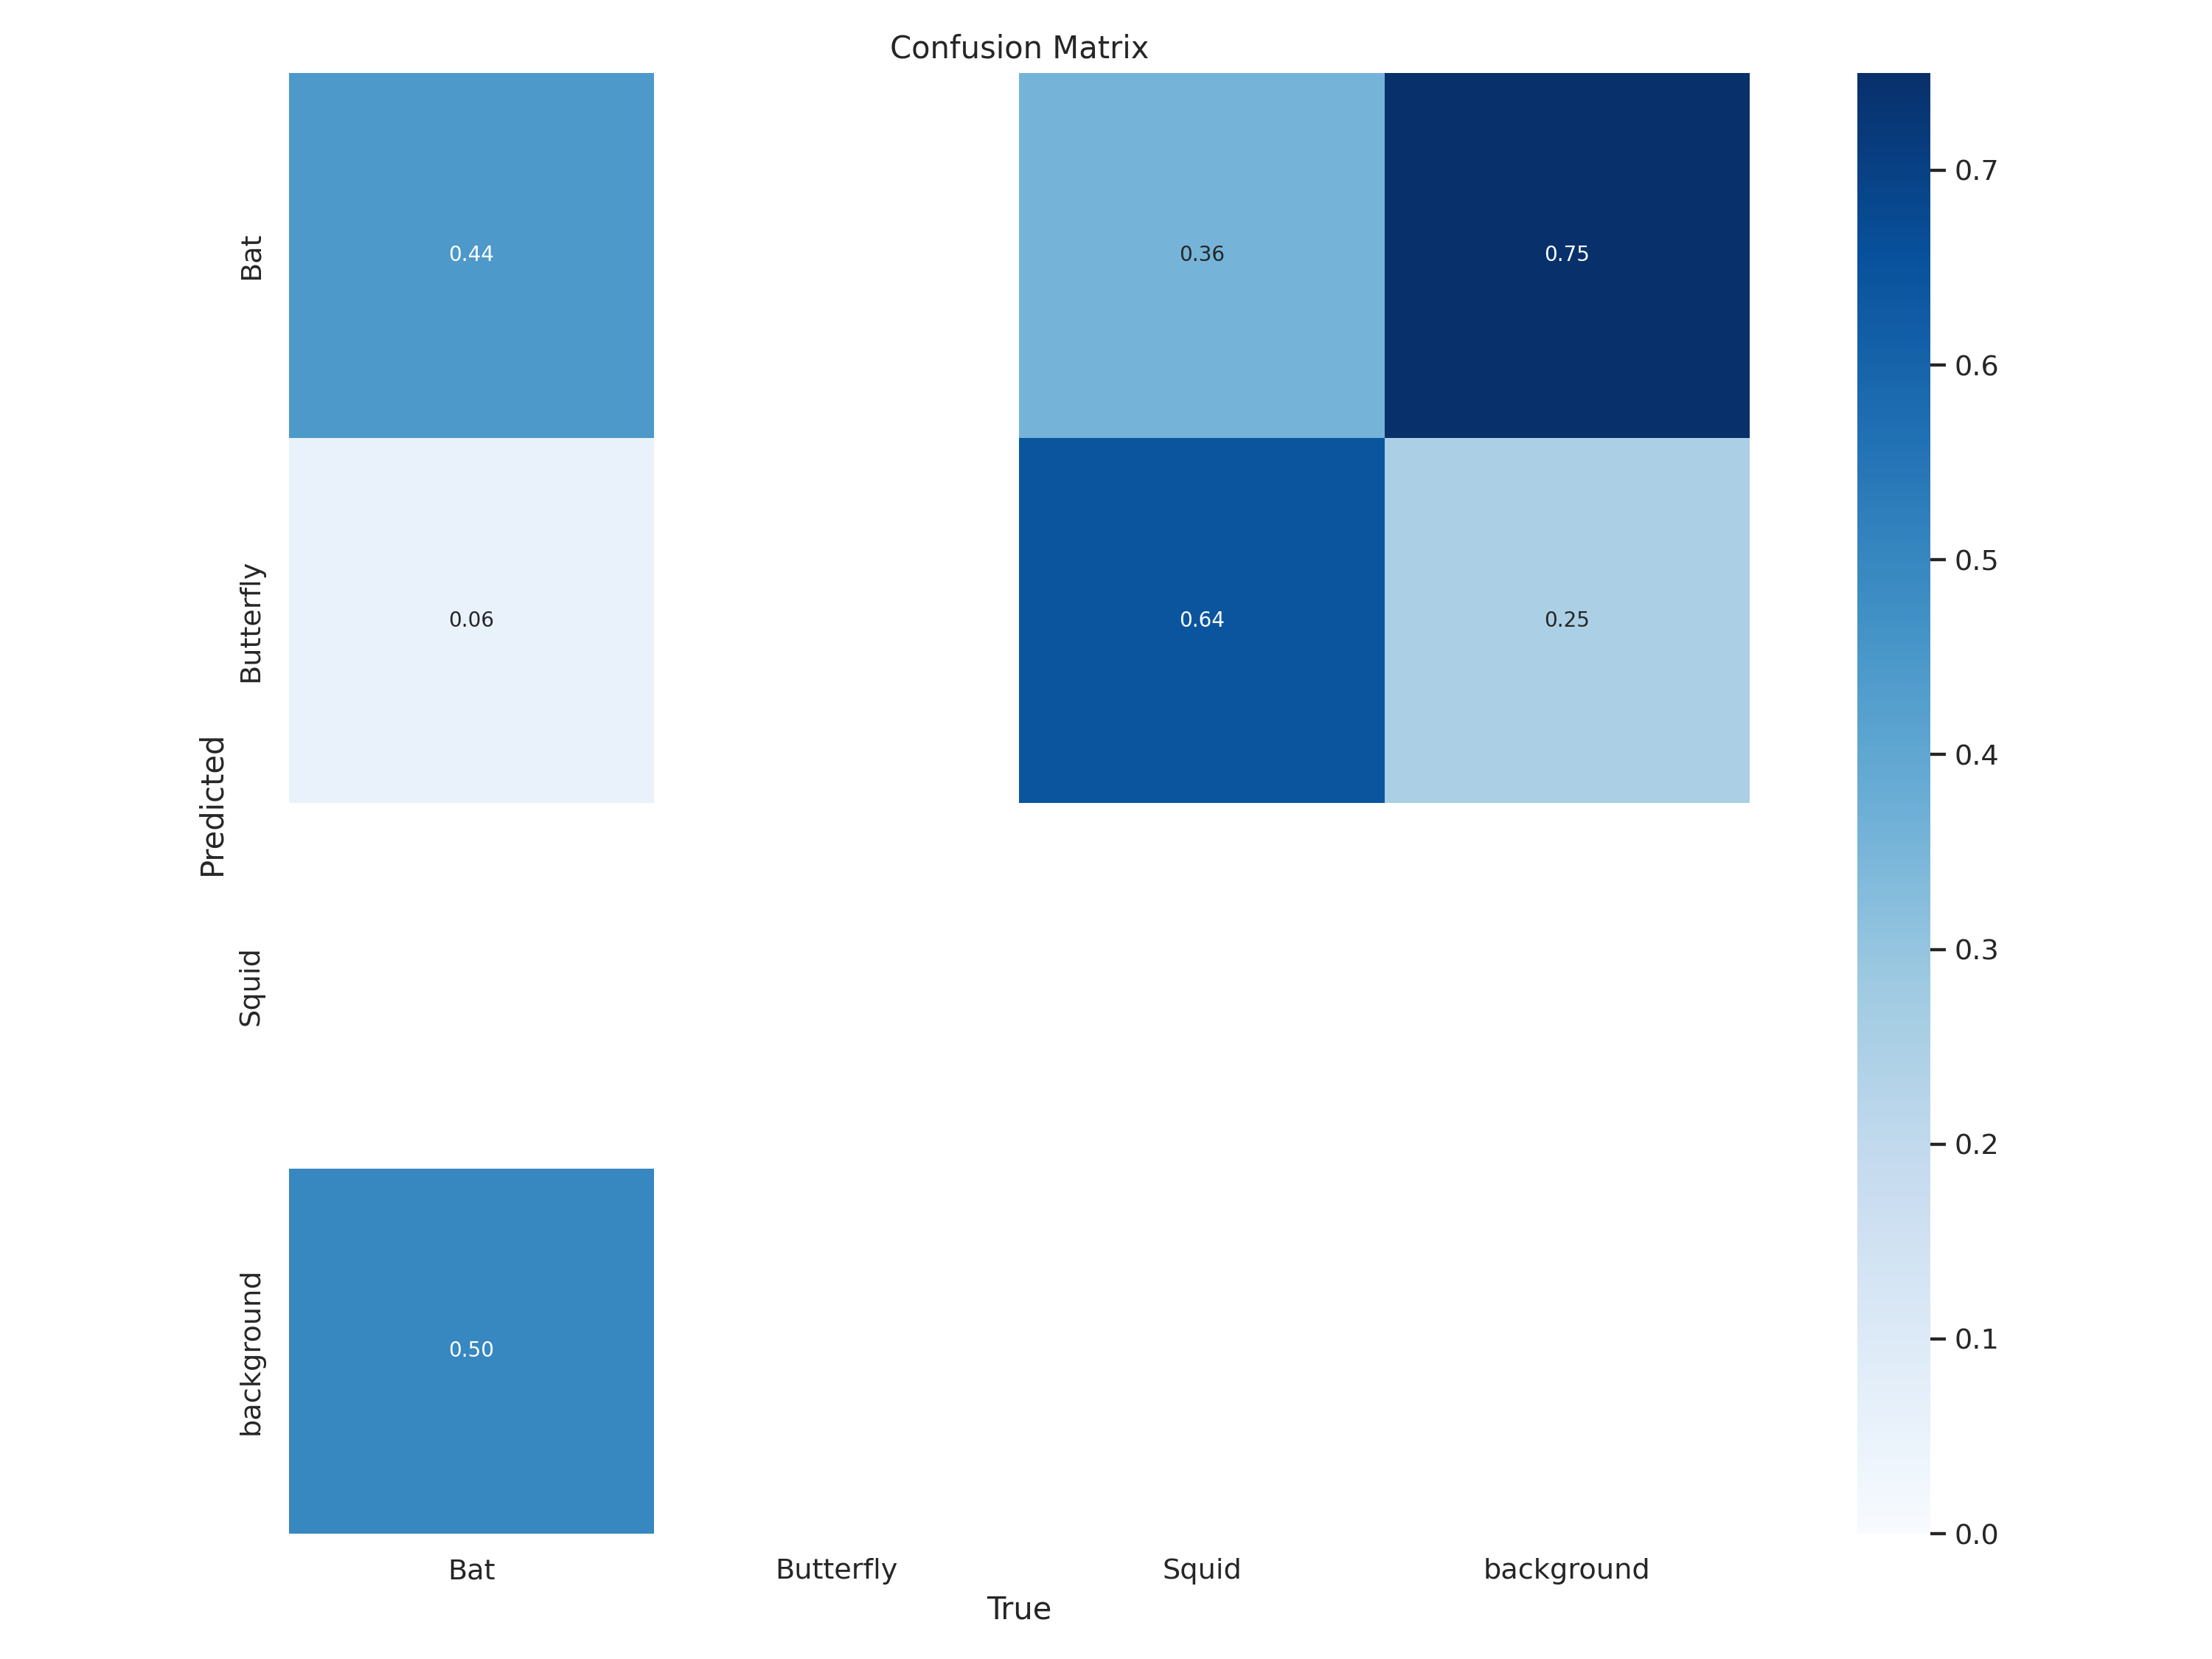

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

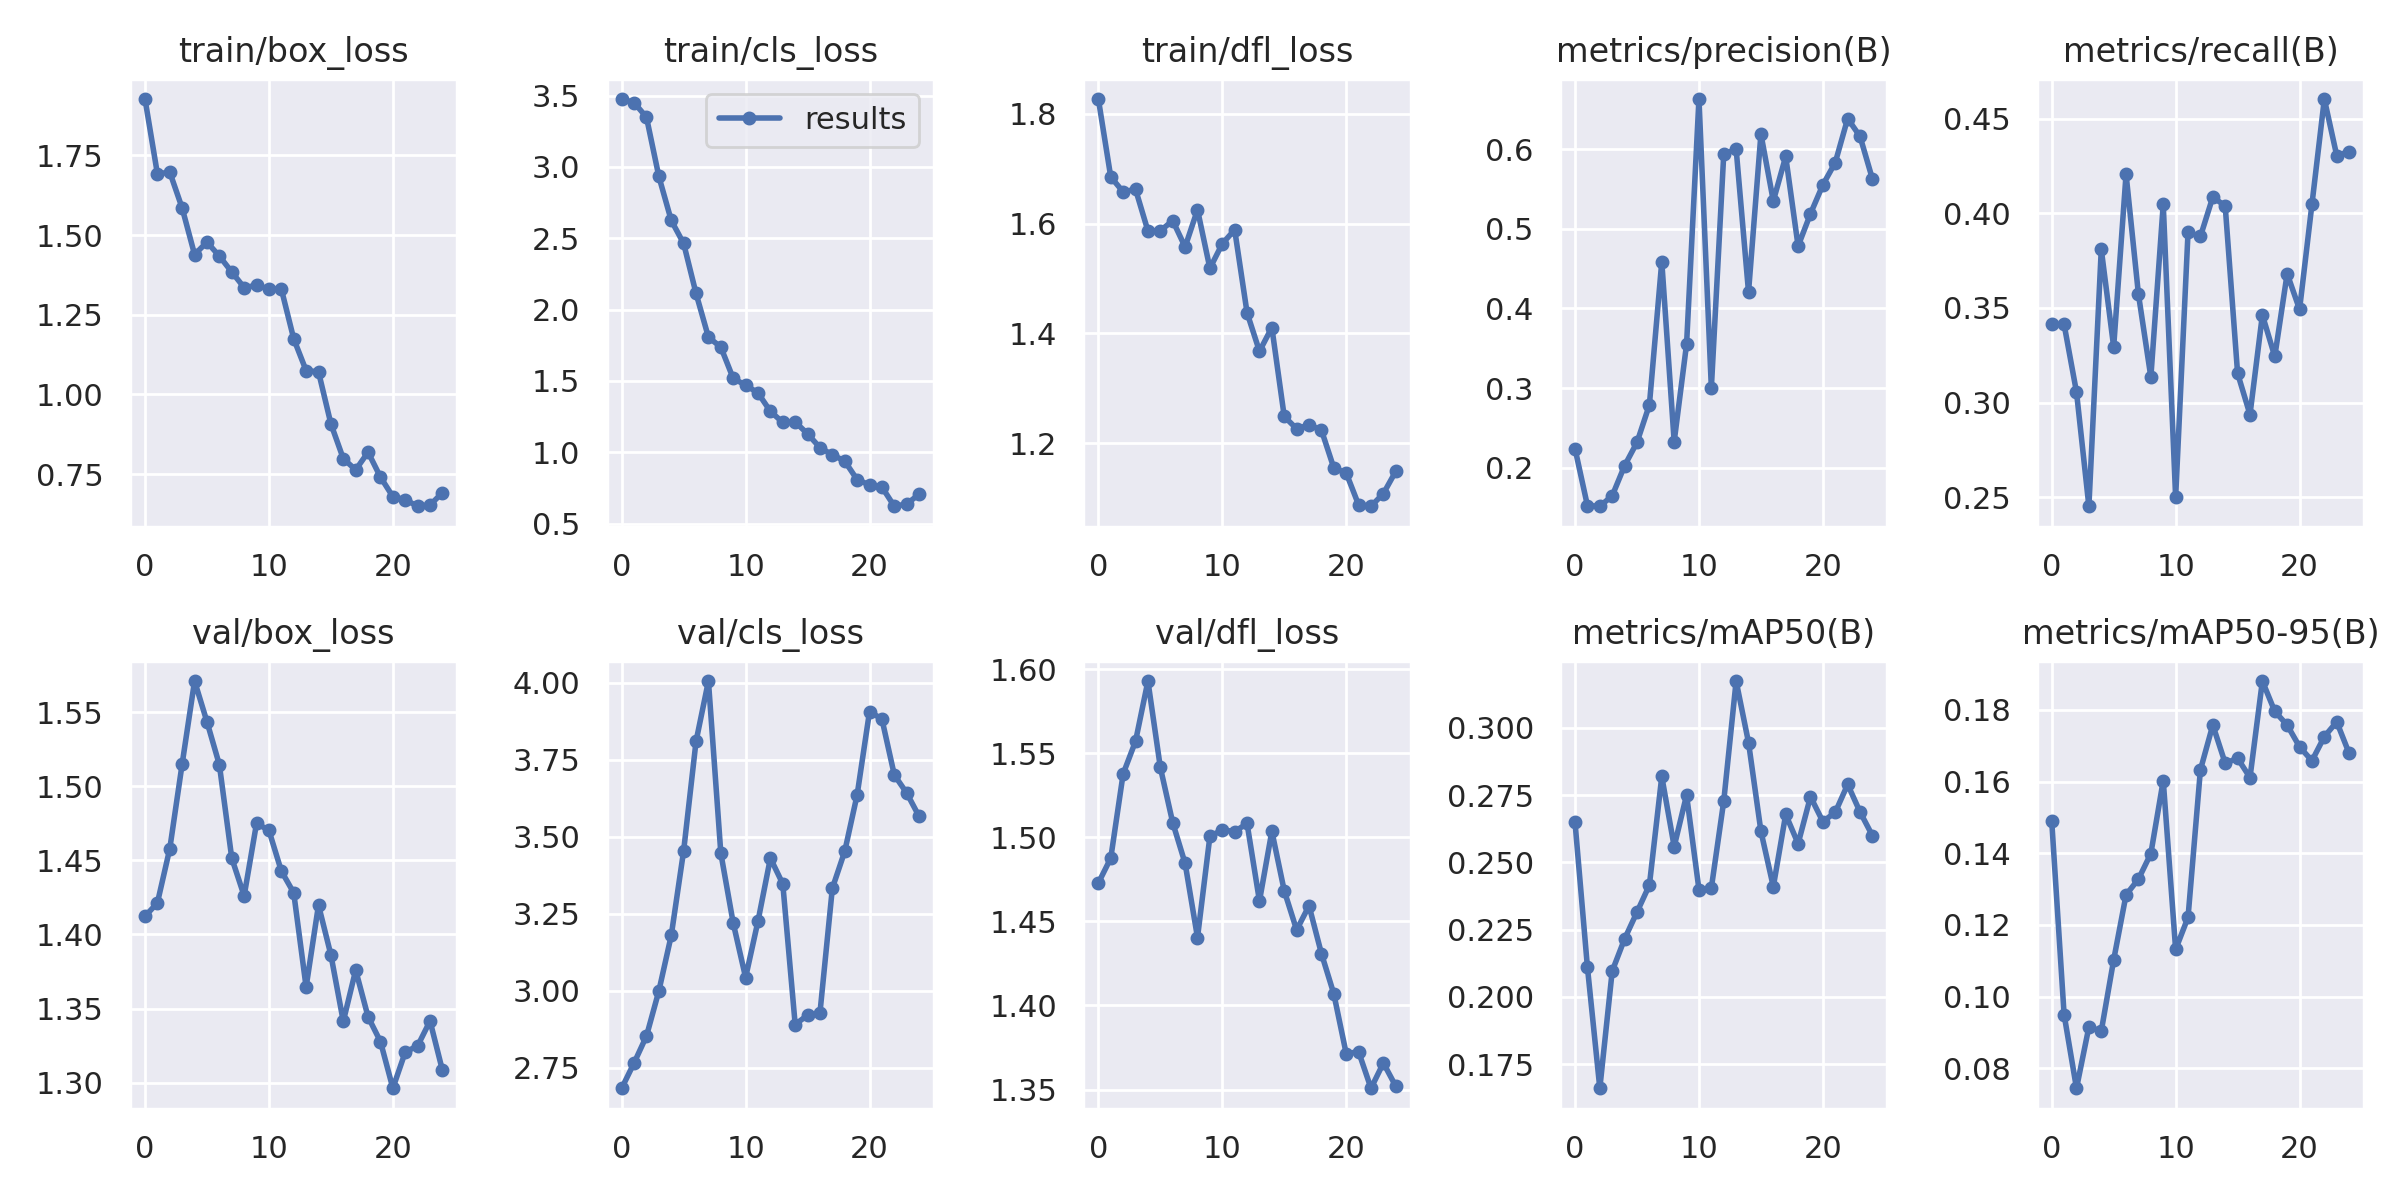

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

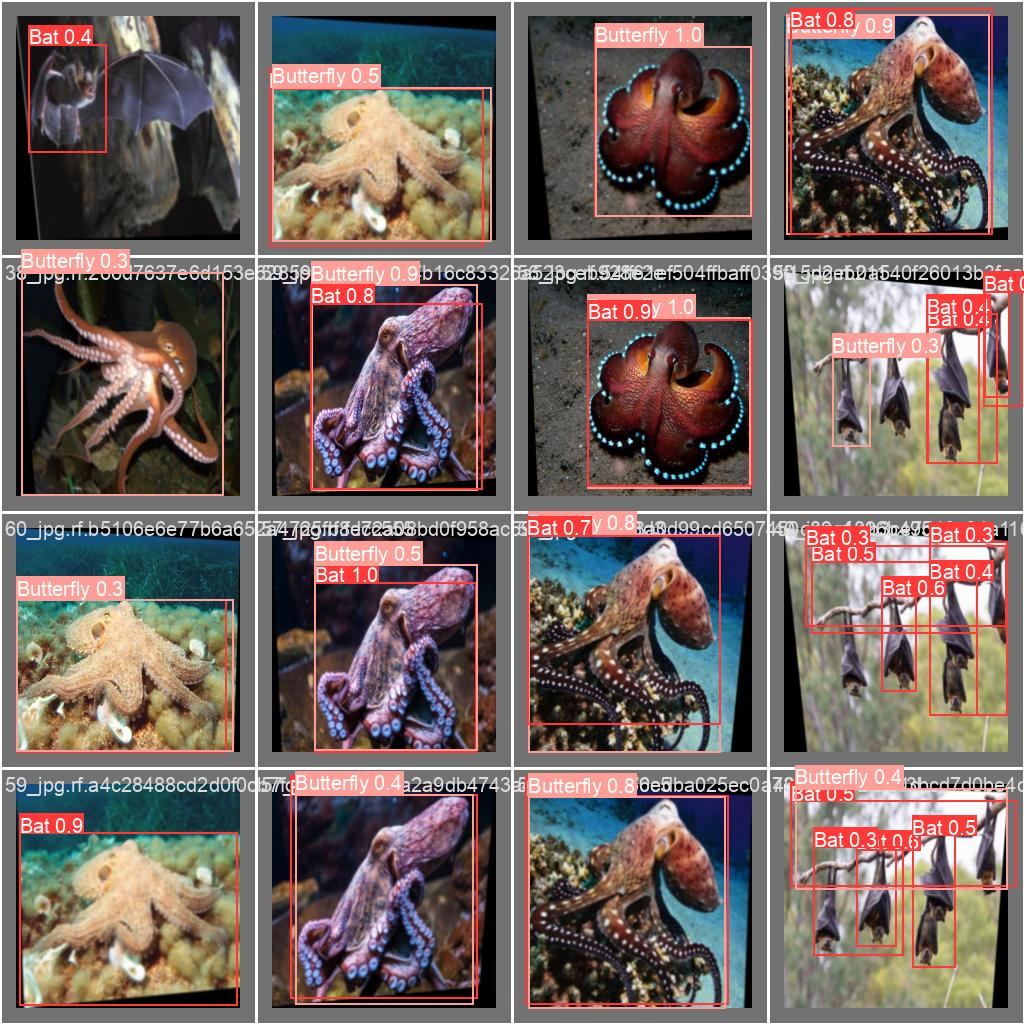

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

**Validate Custom Model**

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Squid_Bat_Butterfly/data.yaml


2024-02-29 00:35:57.696754: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 00:35:57.696822: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 00:35:57.698280: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 00:35:58.926232: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Squid Bat Butterfly/dataset/Validation/labels.cache... 20 im

**Inference with Custom Model**

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.5 source=/content/drive/MyDrive/Squid_Bat_Butterfly/dataset/Test/images

2024-02-29 00:46:27.660286: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 00:46:27.660359: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 00:46:27.661905: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 00:46:29.340538: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/16 /content/drive/MyDrive/Squid_Bat_Butterfly/dataset/Test/images/01_jpg.rf.c8e5235634922

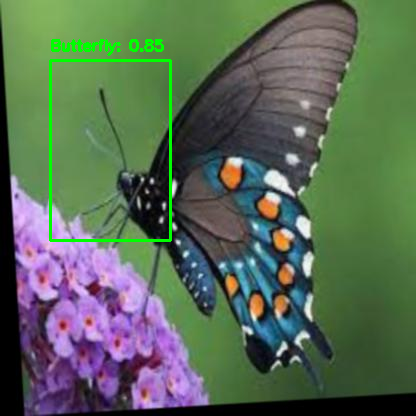

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

#for visualize the detection results
def visualize_detections(image_path, detections):

    image = cv2.imread(image_path)

    for detection in detections:
        class_label = detection['class']
        confidence = detection['confidence']
        bbox = detection['bbox']
        x, y, w, h = bbox.  #extracting bunding boxes coordinates

        #draw the bounding box on the image
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        text = f"{class_label}: {confidence:.2f}"
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2_imshow(image)

image_path = '/content/drive/MyDrive/Squid_Bat_Butterfly/dataset/Test/images/01_jpg.rf.c8e5235634922823096ea135138c7d7f.jpg'
detections = [
    #{'class': 'Bat', 'confidence': 1.00, 'bbox': (10, 20, 100, 150)},
    {'class': 'Butterfly', 'confidence': 0.85, 'bbox': (50, 60, 120, 180)}

]
#visualising the detections
visualize_detections(image_path, detections)


Drive Link --> https://drive.google.com/drive/folders/1H7Gf6ZBbWu8ee72XFI_G1tPqZRIkFmv7?usp=sharing